In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [2]:
df=pd.read_excel("/content/Churn_Modelling.xlsx")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [4]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 859.5+ KB


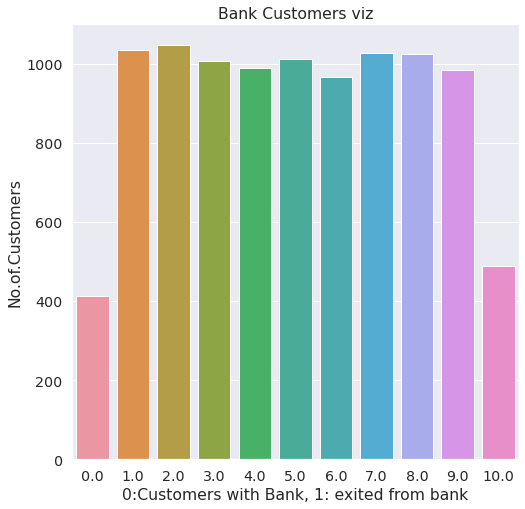

In [6]:
#Perform Univariate Analysis
plt.figure(figsize=(8,8))
sns.countplot(x='Tenure',data=df)
plt.xlabel('0:Customers with Bank, 1: exited from bank')
plt.ylabel('No.of.Customers')
plt.title("Bank Customers viz")
plt.show()

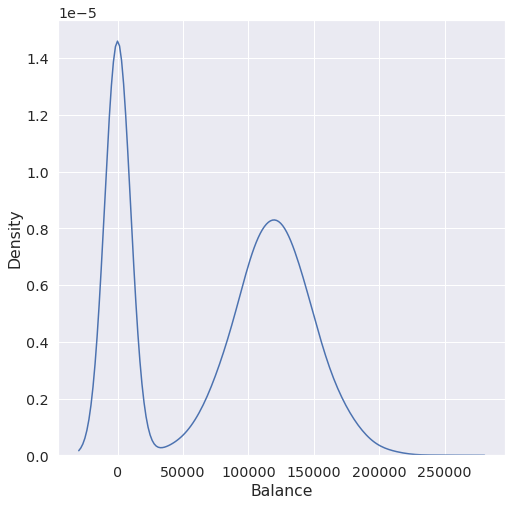

In [7]:
#Perform Univariate Analysis
plt.figure(figsize=(8,8))
sns.kdeplot(x=df['Balance'])

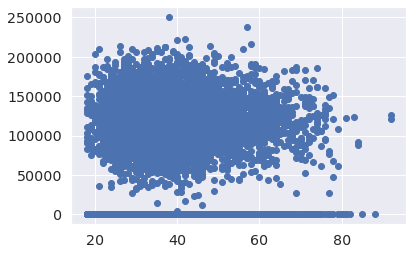

In [8]:
#Perform Bivariate Analysis 
plt.scatter(df.Age,df.Balance)

In [9]:
#Perform Bivariate Analysis
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [10]:
#Perform Bivariate Analysis
import statsmodels.api as sm

#define response variable
y = df['CreditScore']

#define explanatory variable
x = df[['EstimatedSalary']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            CreditScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01916
Date:                Thu, 29 Sep 2022   Prob (F-statistic):              0.890
Time:                        14:58:55   Log-Likelihood:                -59900.
No. Observations:               10000   AIC:                         1.198e+05
Df Residuals:                    9998   BIC:                         1.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             650.7617      1.940    3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<Figure size 288x288 with 0 Axes>

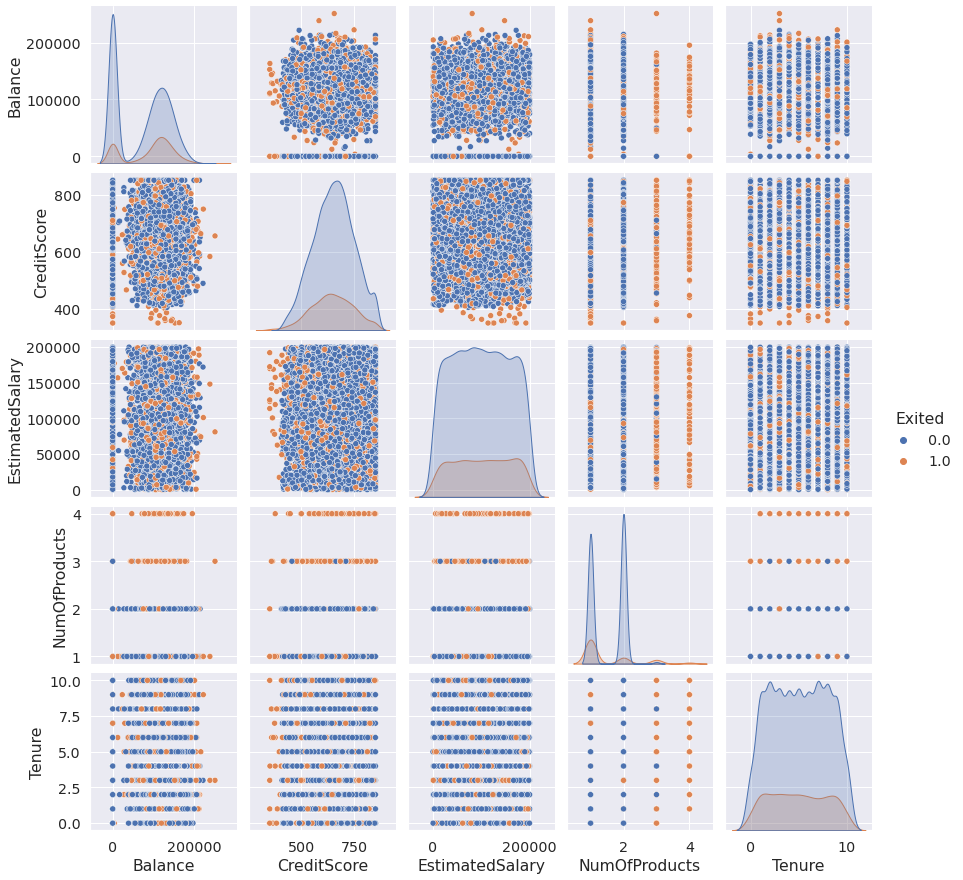

In [11]:
#Perform Multivariate Analysis
plt.figure(figsize=(4,4))
sns.pairplot(data=df[["Balance","CreditScore","EstimatedSalary","NumOfProducts","Tenure","Exited"]],hue="Exited")

In [12]:
#Perform Descriptive Statistics
df=pd.DataFrame(df)
print(df.sum())

CreditScore                                                6505288.0
Geography          FranceSpainFranceFranceSpainSpainFranceGermany...
Gender             FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa...
Age                                                         389218.0
Tenure                                                       50128.0
Balance                                                 764858892.88
NumOfProducts                                                15302.0
HasCrCard                                                     7055.0
IsActiveMember                                                5151.0
EstimatedSalary                                        1000902398.81
Exited                                                        2037.0
dtype: object


In [13]:
#Perform Descriptive Statistics
print("----Sum Value-----")
print(df.sum(1))
print("----------------------------------")
print("-----Product Value-----")
print(df.prod())
print("----------------------------------")

----Sum Value-----
0       102015.88
1       197002.44
2       274149.37
3        94567.63
4       205492.92
          ...    
9995     97088.64
9996    159633.38
9997     42840.58
9998    168784.83
9999    169159.57
Length: 10000, dtype: float64
----------------------------------
-----Product Value-----
CreditScore        inf
Age                inf
Tenure             0.0
Balance            0.0
NumOfProducts      inf
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    inf
Exited             0.0
dtype: float64
----------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [14]:
#Perform Descriptive Statistics
print("----------Mean Value-----------")
print(df.mean())
print("-------------------------------")
print("----------Median Value---------")
print(df.median())
print("-------------------------------")
print("----------Mode Value------------")
print(df.mode())
print("-------------------------------")

----------Mean Value-----------
CreditScore           650.528800
Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
HasCrCard               0.705500
IsActiveMember          0.515100
EstimatedSalary    100090.239881
Exited                  0.203700
dtype: float64
-------------------------------
----------Median Value---------
CreditScore           652.000
Age                    37.000
Tenure                  5.000
Balance             97198.540
NumOfProducts           1.000
HasCrCard               1.000
IsActiveMember          1.000
EstimatedSalary    100193.915
Exited                  0.000
dtype: float64
-------------------------------
----------Mode Value------------
   CreditScore Geography Gender   Age  Tenure  Balance  NumOfProducts  \
0        850.0    France   Male  37.0     2.0      0.0            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0        1.0             1.0         24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [15]:
#Handling with missing Values
df.isnull().values;
#Checking values are null

In [16]:
#Handling with missing Values
df.notnull()#Checking values are not null

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True,True


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


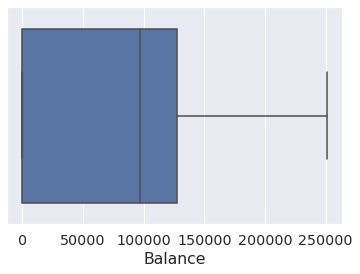

In [17]:
#Find outliers & replace the outliers
sns.boxplot(df['Balance'])

In [18]:
#Find outliers & replace the outliers
print(np.where(df['Balance']>100000))

(array([   2,    4,    5, ..., 9987, 9993, 9999]),)


In [19]:
#Find outliers & replace the outliers
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df["EstimatedSalary"]))
print(z)

0       0.021886
1       0.216534
2       0.240687
3       0.108918
4       0.365276
          ...   
9995    0.066419
9996    0.027988
9997    1.008643
9998    0.125231
9999    1.076370
Name: EstimatedSalary, Length: 10000, dtype: float64


In [20]:
#Check for categorical columns & performs encoding
from sklearn.preprocessing import LabelEncoder
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
#Check for categorical columns & performs encoding
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [22]:
#Check for categorical columns & performs encoding
encoding=LabelEncoder()
df["Gender"]=encoding.fit_transform(df.iloc[:,1].values)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,Spain,2,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,France,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,France,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,Spain,2,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0
9996,516.0,France,0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0
9997,709.0,France,0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0
9998,772.0,Germany,1,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0


In [23]:
#Check for categorical columns & performs encoding


In [ ]:
#Split the data into Dependent & Independent Variables
print("----------Dependent Variables----------")
X=df.iloc[:,1:4]
print(X)
print("---------------------------------------")
print("---------Independent Variables---------")
Y=df.iloc[:,4]
print(Y)
print("---------------------------------------")

In [29]:
#Split the data into training & testing
from sklearn.model_selection import train_test_split

In [34]:
#Split the data into training & testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=4,random_state=4)
x_train

,const,EstimatedSalary
2558,1.0,137903.54
7642,1.0,121765.00
8912,1.0,109470.34
3319,1.0,2923.61
6852,1.0,7312.25
...,...,...
456,1.0,7666.73
6017,1.0,9085.00
709,1.0,147794.63
8366,1.0,102515.42


In [31]:
#Split the data into training & testing
x_test

,const,EstimatedSalary
1603,1.0,23305.85
8713,1.0,41248.80
4561,1.0,143317.42
6600,1.0,174123.16


In [32]:
#Split the data into training & testing
y_train

2558    727.0
7642    811.0
8912    623.0
3319    430.0
6852    600.0
        ...  
456     733.0
6017    487.0
709     686.0
8366    637.0
1146    614.0
Name: CreditScore, Length: 9996, dtype: float64

In [33]:
#Split the data into training & testing
y_test

1603    576.0
8713    786.0
4561    562.0
6600    505.0
Name: CreditScore, dtype: float64